## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\daivi\Desktop\PROJECTS\DATA_SCIENCE\MEDICAL INSURANCE - KAGGLE\insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is good, now lets do EDA with some good Visualization

Text(0.5, 1.0, 'Distribution of Charges')

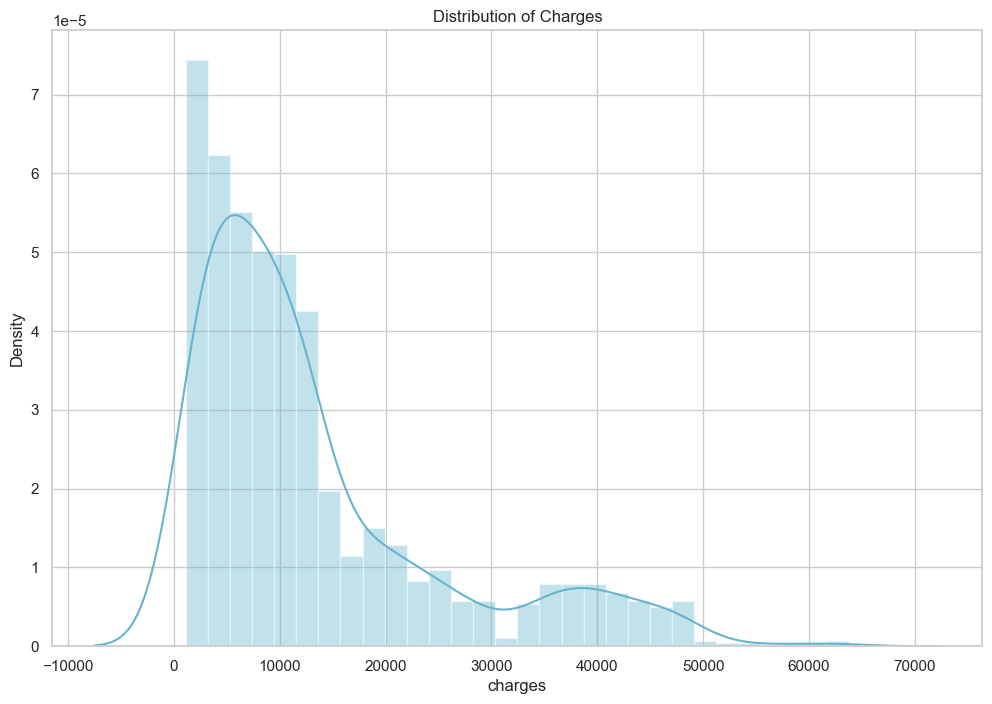

In [13]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.distplot(df['charges'], kde=True, color = 'c')
plt.title('Distribution of Charges')


If the distribution of charges is right-skewed, you might consider applying a transformation to the data to make it more symmetric. Common transformations include the logarithmic transformation or the square root transformation.

This distribution is right-skewed. To make it closer to normal we can apply natural log

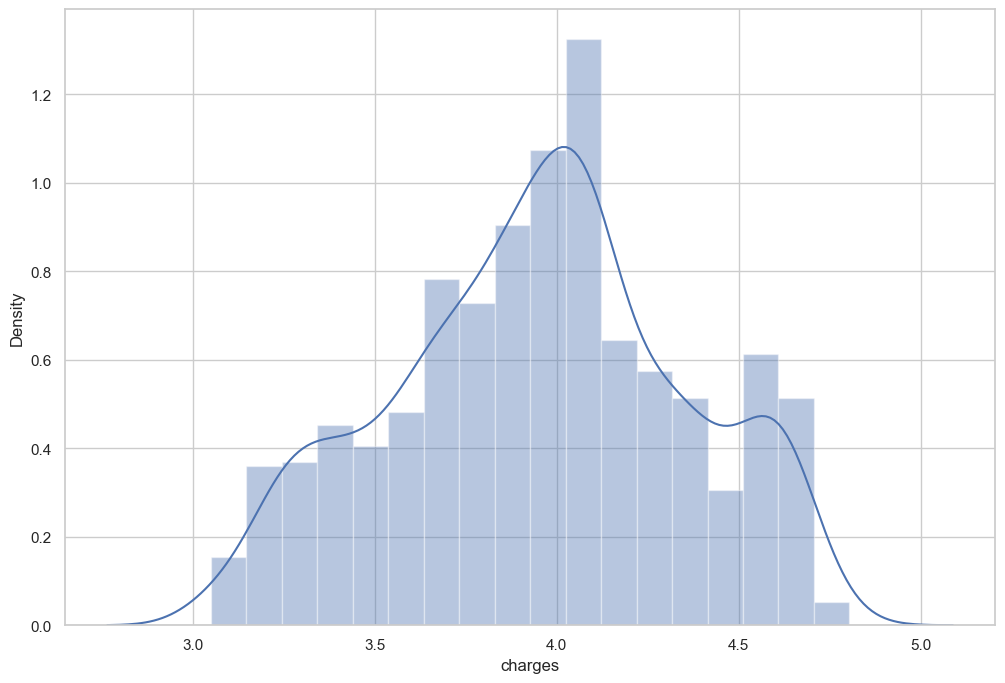

In [14]:
f, ax = plt.subplots(1, 1, figsize = (12,8))
ax = sns.distplot(np.log10(df['charges']), kde=True, color = 'b')

Now let's look at the charges by region

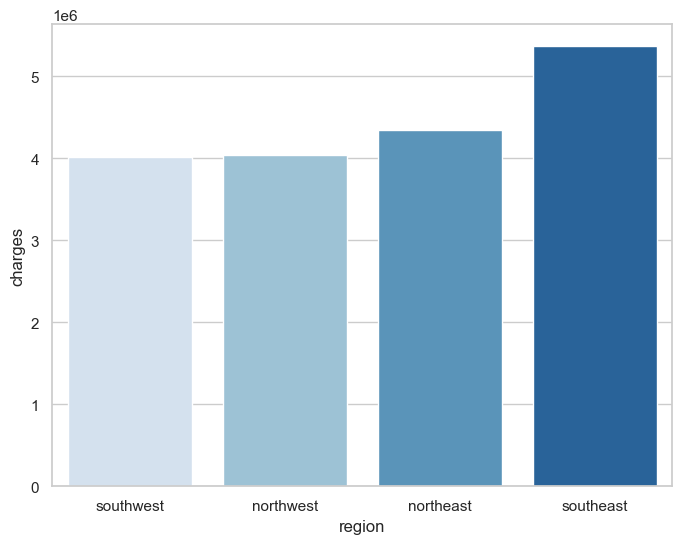

In [22]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax = sns.barplot(x = charges.head().index, y = charges.head(), palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

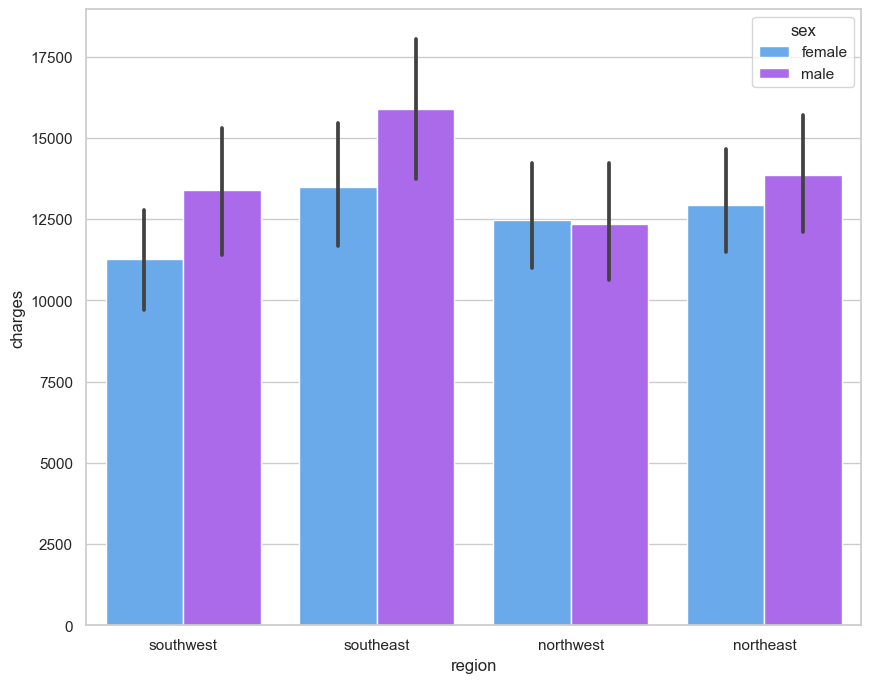

In [23]:
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x='region', y = 'charges', hue = 'sex', data = df, palette = 'cool')

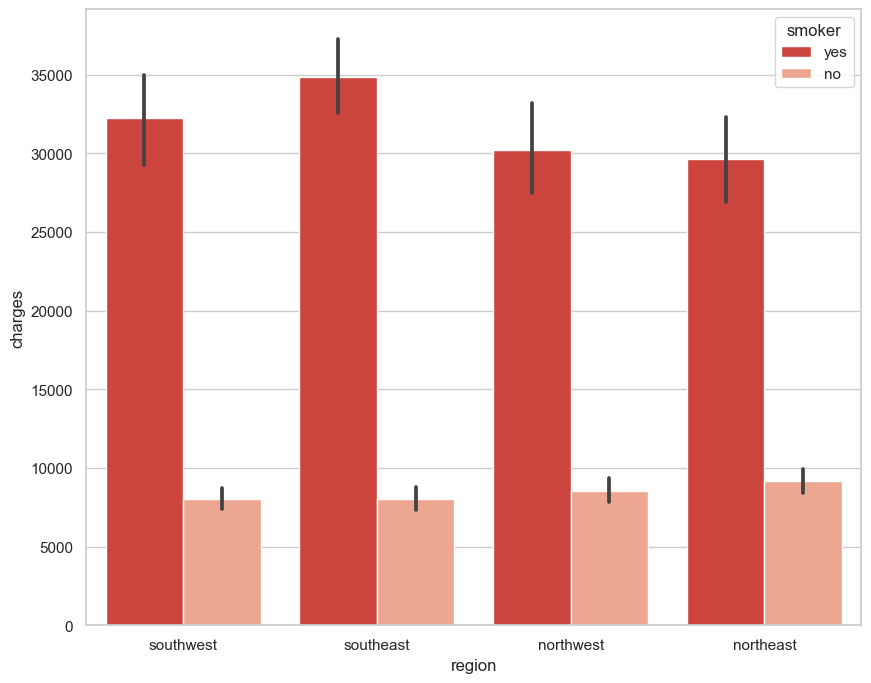

In [25]:
f, ax = plt.subplots(1, 1, figsize=(10,8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data = df, palette='Reds_r')

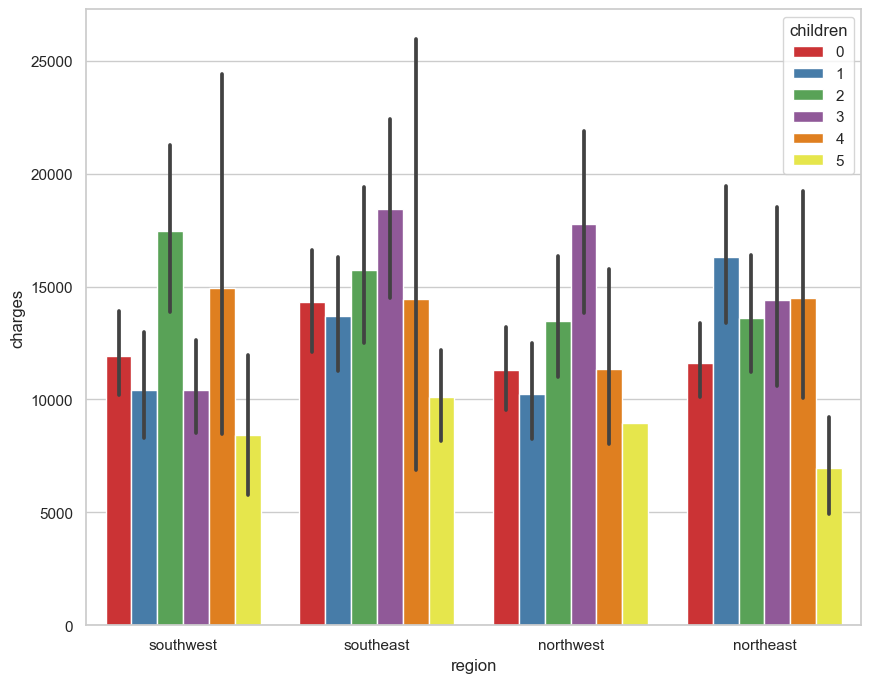

In [27]:
f, ax = plt.subplots(1, 1, figsize=(10,8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

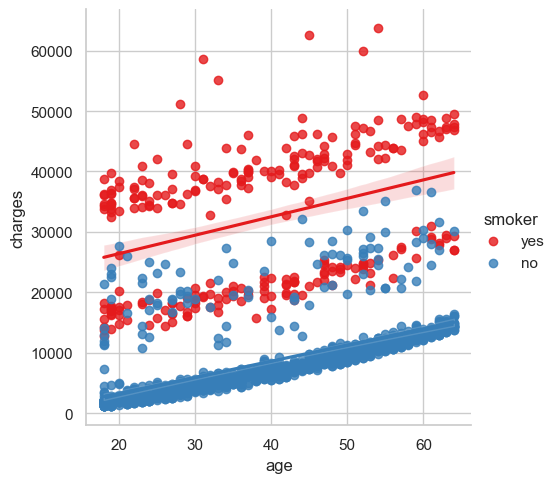

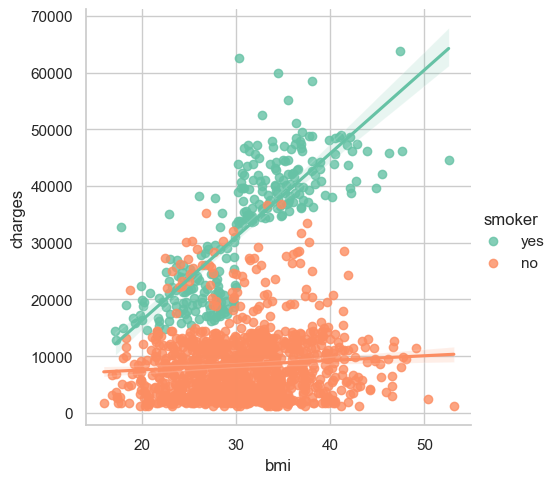

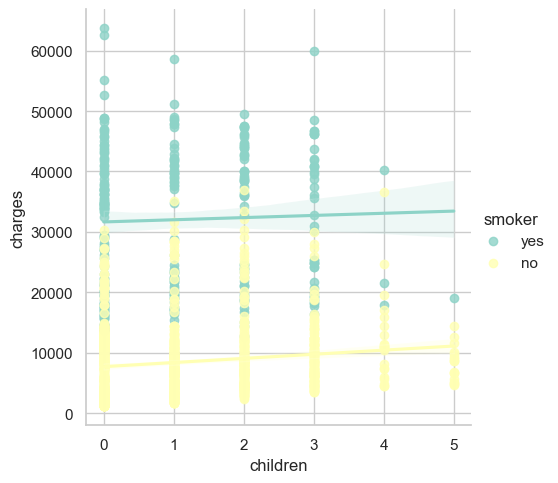

In [29]:
ax = sns.lmplot(x = 'age', y = 'charges', hue='smoker', data = df, palette='Set1')
ax = sns.lmplot(x= 'bmi', y = 'charges', hue = 'smoker', data = df, palette = 'Set2')
ax = sns.lmplot(x = 'children', y = 'charges', hue = 'smoker', data = df, palette = 'Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

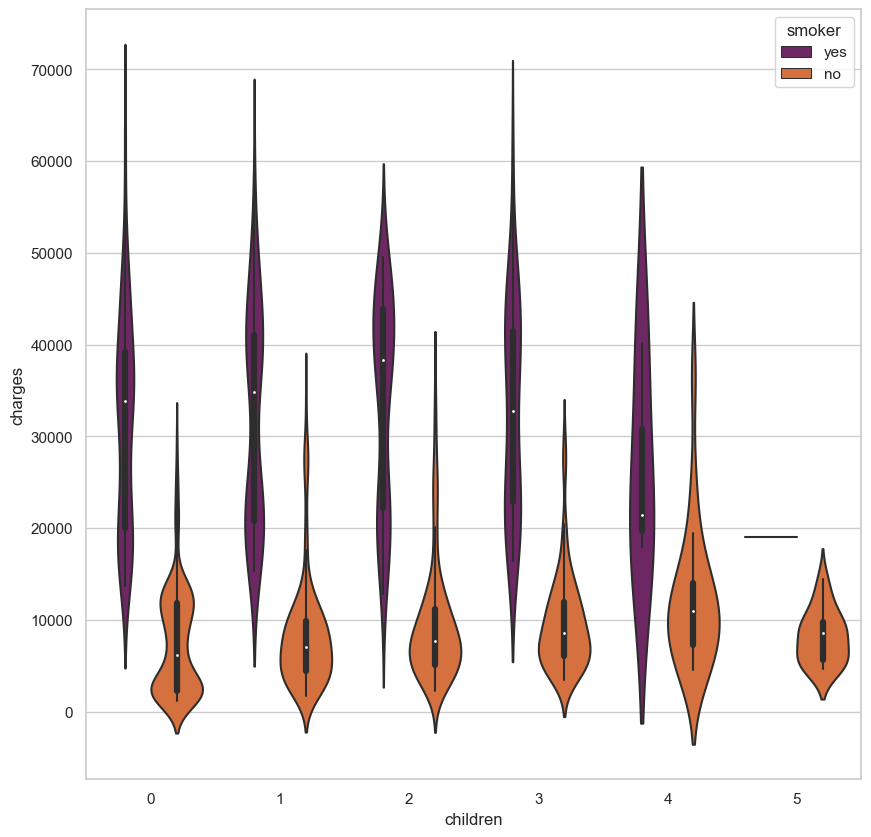

In [31]:
f, ax = plt.subplots(1, 1, figsize=(10,10))
ax = sns.violinplot(x='children', y='charges', data =df, orient='v', hue='smoker', palette='inferno')

In [32]:
#Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

In [35]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [36]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

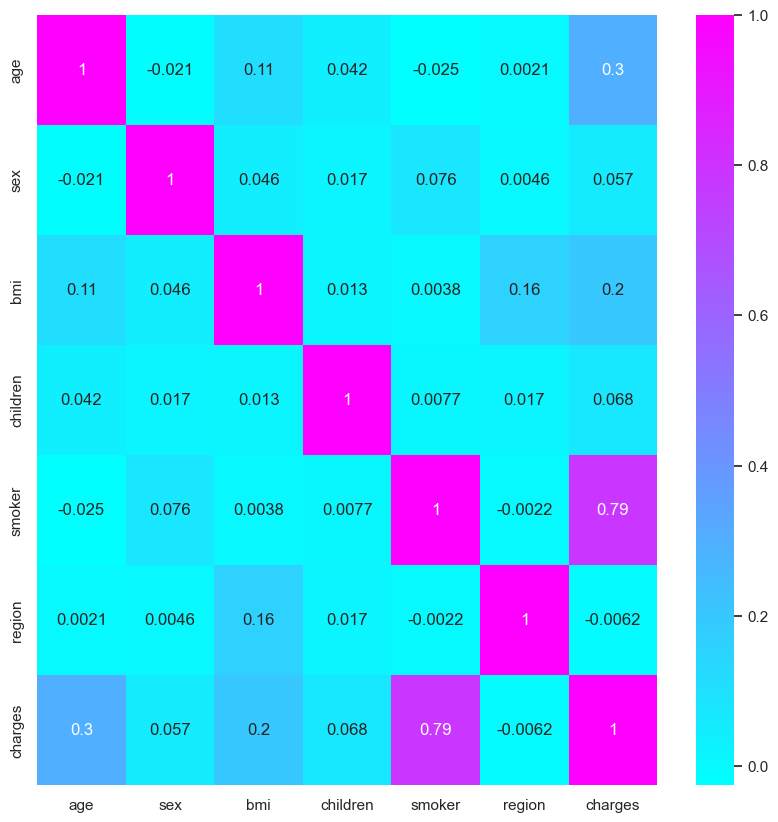

In [42]:
f, ax = plt.subplots(1, 1, figsize = (10,10))
ax= sns.heatmap(df.corr(), annot = True, cmap ='cool')

No correlation, except with the smoking

## LINEAR REGRESSION

In [46]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size = 0.2, random_state = 0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print("Intercept: ", Lin_reg.intercept_)
print("Coefficients: ", Lin_reg.coef_)
print('R2 Score: ', Lin_reg.score(x_test, y_test))

Intercept:  -11661.983908824413
Coefficients:  [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
R2 Score:  0.7998747145449959


Intercept: -11661.98
This is the value of the y-intercept in the linear regression equation. It represents the estimated value of the target variable when all predictor variables are zero.

Coefficients:
These are the coefficients of the linear regression model, representing the change in the target variable for a one-unit change in each corresponding predictor variable, assuming all other variables are held constant.

R² (coefficient of determination): 0.7999
R² is a measure of how well the model explains the variability in the target variable. In this case, the model explains approximately 79.99% of the variance in the test set.

The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

## RIDGE REGRESSION

Ridge regression is a statistical regularization technique. It corrects for overfitting on training data in machine learning models.

Ridge regression—also known as L2 regularization—is one of several types of regularization for linear regression models

Ridge regression specifically corrects for multicollinearity in regression analysis. This is useful when developing machine learning models that have a large number of parameters, particularly if those parameters also have high weights.

Multicollinearity denotes when two or more predictors have a near-linear relationship.

In [48]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha = 0.5)
Ridge.fit(x_train, y_train)
print("Intercept: ", Ridge.intercept_)
print("Coefficients: ", Ridge.coef_)
print('R2 Score: ', Ridge.score(x_test, y_test))

Intercept:  -11643.440927495807
Coefficients:  [ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
R2 Score:  0.7996989632063138


## LASSO REGRESSION

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

The primary goal of LASSO regression is to find a balance between model simplicity and accuracy.

In [52]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
#To normalize the features we need to first scale it
# Standardize/normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and fit the Lasso model
Lasso = Lasso(alpha = 0.2, fit_intercept = True, precompute = False, max_iter = 1000, tol=0.0001, warm_start = False, positive = False, random_state=None, selection='cyclic')
Lasso.fit(x_train_scaled, y_train)

print("Intercept: ", Lasso.intercept_)
print("Coefficients: ", Lasso.coef_)
print('R2 Score: ', Lasso.score(x_test_scaled, y_test))

Intercept:  13201.182056009347
Coefficients:  [3576.4593532   -11.93997214 2030.48444748  536.65554852 9508.9435275
 -318.8221457 ]
R2 Score:  0.799870509534465


## RANDOM FOREST REGRESSION

Ensemble learning is a machine learning technique that combines the predictions from multiple models to create a more accurate and stable prediction. It is an approach that leverages the collective intelligence of multiple models to improve the overall performance of the learning system.

A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It is a type of supervised learning algorithm that can be used for both classification and regression tasks.

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Assuming df, x_train, x_test, y_train, y_test are already defined

# Extracting features (x) and target variable (y)
x = df.drop(['charges'], axis=1)
y = df.charges

# Creating a RandomForestRegressor model
Rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)

# Fitting the model to the training data
Rfr.fit(x_train, y_train)

# Predicting on the training and test sets
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

# Calculating and printing Mean Squared Error (MSE) for train and test sets
print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(y_train, x_train_pred),
       metrics.mean_squared_error(y_test, x_test_pred)))

# Calculating and printing R-squared (R2) for train and test sets
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train, x_train_pred),
       metrics.r2_score(y_test, x_test_pred)))


MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.975, R2 test data: 0.876


We create a RandomForestRegressor with 100 trees (n_estimators), mean squared error as the splitting criterion (criterion='mse'), setting a random seed for reproducibility (random_state=1), and utilizing all available processors for parallel processing (n_jobs=-1)

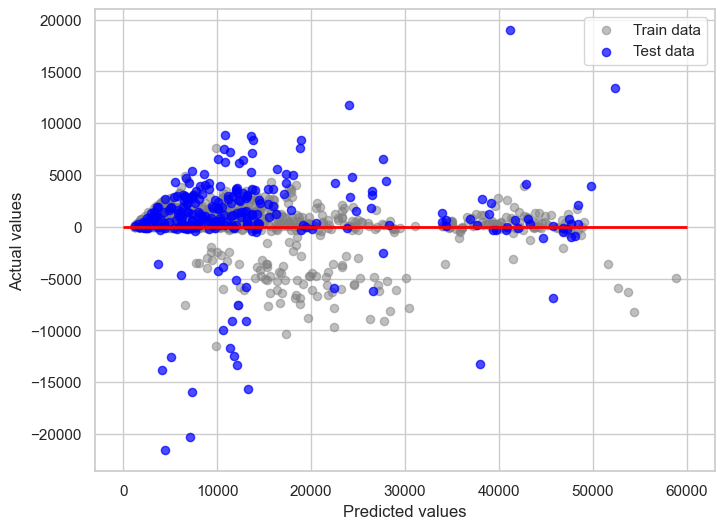

In [59]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

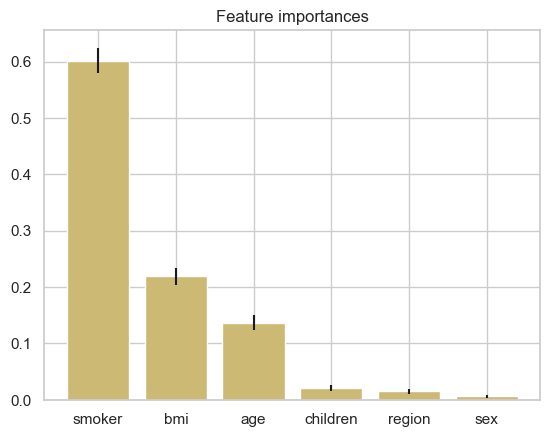

In [60]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

## POLYNOMIAL REGRESSION

In [61]:
from sklearn.preprocessing import PolynomialFeatures

# Extracting features (x) and target variable (y)
x = df.drop(['charges', 'sex', 'region'], axis=1)
y = df.charges

# Creating polynomial features of degree 2
pol = PolynomialFeatures(degree=2)
x_pol = pol.fit_transform(x)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)

# Creating and fitting the Polynomial Regression model
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

# Predictions on training and test sets
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

# Printing the intercept, coefficients, and R-squared score
print("Intercept:", Pol_reg.intercept_)
print("Coefficients:", Pol_reg.coef_)
print("R2 Score:", Pol_reg.score(x_test, y_test))

Intercept: -5325.8817052527975
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
R2 Score: 0.8812595703345231


In [62]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776463
Mean Squared Error: 18895160.09878035
Root Mean Squared Error: 4346.856346692441


In [63]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


### Conclusion: like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Polynomial Regression turned out to be the best model